In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
%cd ../data

/home/butch2/play/kaggle/commmonlit/data


In [4]:
!ls 

commonlitreadabilityprize.zip  sample_submission.csv  test.csv	train.csv


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [7]:
df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

In [27]:
len(df)

2834

In [48]:
df[df.url_legal.notna()].head().url_legal

249    https://simple.wikipedia.org/wiki/Battle_of_Br...
250    https://simple.wikipedia.org/wiki/Battle_of_Sa...
251    https://simple.wikipedia.org/wiki/Battle_of_Wa...
253               https://en.wikipedia.org/wiki/Big_data
254              https://en.wikipedia.org/wiki/Biodiesel
Name: url_legal, dtype: object

In [49]:
df[df.license.notna()].head().license

249    CC BY-SA 3.0 and GFDL
250    CC BY-SA 3.0 and GFDL
251    CC BY-SA 3.0 and GFDL
253             CC BY-SA 3.0
254             CC BY-SA 3.0
Name: license, dtype: object

In [30]:
df.excerpt.isna().count()

2834

In [ ]:
# drop license, url_legal, 
# 

## Look at what `target` could mean.

In [22]:
print(df.iloc[0].excerpt, df.iloc[0].target, df.iloc[0].standard_error)

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes. -0.3402

In [10]:
df.target.sum()

-2718.709394165

In [25]:
df[df.target.isna()].target.count()

0

In [11]:
df.target.mean()

-0.9593187699947089

In [12]:
df.target.max()

1.711389827

In [13]:
df.target.min()

-3.676267773

<AxesSubplot:>

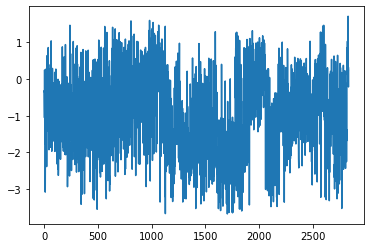

In [14]:
df.target.plot()

In [50]:
len(df[df.standard_error.notna()])

2834

In [51]:
df.standard_error.mean()

0.4914350909897673

In [17]:
print(df[df.target == df.target.max()].excerpt.values)

['When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.']


In [18]:
print(df[df.target == df.target.min()].excerpt.values)

['The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, mounted 

In [20]:
df[df.target == 0].target.count()

1

In [21]:
print(df[df.target == 0].excerpt.values)

['The sun was shining in a cloudless sky, and no shadows lay on the mountain, and all day long they watched and waited, and at last, when the birds were singing their farewell song to the evening star, the children saw the shadows marching from the glen, trooping up the mountain side and dimming the purple of the heather.\nAnd when the mountain top gleamed like a golden spear, they fixed their eyes on the line between the shadow and the sunshine.\n"Now," said Connla, "the time has come."\n"Oh, look! look!" said Nora, and as she spoke, just above the line of shadow a door opened out, and through its portals came a little piper dressed in green and gold. He stepped down, followed by another and another, until they were nine in all, and then the door slung back again.']


## INITIAL Conclusions
 * lower target scores is more complex, higher target scores less complexity
 * low count of samples



## IDEAS

 * reading level complexity of a corpus is a combination of 1) vocabulary, 2) sentence construction, 3) paragraph construction.
 * approaches
     - create a simple baseline model
     - iterate quickly
     - look at expanding corpus for lang model finetuning before training
     - monitor overfitting
     - submit only to check other day 
     - create own test set
     - train/val/test split (70,20,10)
 